In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from collections import Counter

In [193]:
df_time = pd.read_csv('./bin/9_28_large_time_result.csv')

In [194]:
df_time['reconcILSTime'][33]

0.2387416690035024

In [195]:
df_time['dlcparTime'][31]

0.569509446999291

<AxesSubplot:>

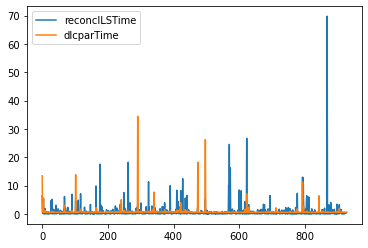

In [196]:
df_time[['reconcILSTime','dlcparTime']].plot()

In [197]:
df_time[['reconcILSTime','dlcparTime']].mean()

reconcILSTime    0.907600
dlcparTime       0.810943
dtype: float64

In [198]:
list(df_time[df_time.reconcILSTime>50]['Gene_tree'])

['((((D,D),((((C,C),B),A),((D,D),((A,A),B)))),((C,A),B)),(((F,F),E),(E,F)));']

In [184]:
df_diff_D = df_time[df_time['dlcparTime']<df_time['reconcILSTime']].fillna('')
df_diff_D

,Replicate,Gene_tree,reconcILSTime,dlcparTime
1,1,"(((F,E),(D,((B,A),C))),(D,((A,B),C)));",0.674539,0.544924
3,3,"(((F,E),D),((((C,B),(C,A)),(A,((C,B),B))),D));",3.043467,0.602316
8,8,"(((C,D),D),((F,(F,E)),(E,(E,F))));",1.489896,0.537085
9,9,"(((((C,(D,A)),((B,A),D)),A),((B,(C,A)),D)),(F,...",1.701257,1.173079
10,10,"((A,C),((((F,E),(E,F)),((E,F),F)),D));",0.653904,0.535989
...,...,...,...,...
908,979,"((((E,F),((E,F),F)),(E,F)),(((C,A),B),D));",0.904203,0.522611
909,980,"(F,((C,((B,((A,B),D)),C)),(B,A)));",1.212997,0.737078
910,981,"(((((A,(B,C)),((C,(B,A)),D)),A),B),(E,F));",1.369372,0.613224
911,982,"((((F,((E,F),F)),(F,E)),F),((B,A),D));",1.292101,0.575057


In [135]:
df_diff_D[(df_diff_D.reconcILSTime >100)]

,Replicate,Gene_tree,reconcILSTime,dlcparTime


In [226]:
df = pd.read_csv('./bin/9_28_large_result.csv')

In [200]:
df

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
0,True Process,0,"((((A,B),C),((B,A),D)),((E,F),((((B,B),((B,C),...","(((A,(B,C)),D),(E,F));",12,11,9,5,3,8
1,DLCpar,0,"((((A,B),C),((B,A),D)),((E,F),((((B,B),((B,C),...","(((A,(B,C)),D),(E,F));",6,0,7,1,0,0
2,Our_algorithm,0,"((((A,B),C),((B,A),D)),((E,F),((((B,B),((B,C),...","(((A,(B,C)),D),(E,F));",8,6,0,4,0,0
3,True Process,1,"(((F,E),(D,((B,A),C))),(D,((A,B),C)));","(((A,(B,C)),D),(E,F));",2,5,5,1,0,1
4,DLCpar,1,"(((F,E),(D,((B,A),C))),(D,((A,B),C)));","(((A,(B,C)),D),(E,F));",1,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2779,DLCpar,998,"(((C,(D,A)),B),((F,E),E));","(((A,(B,C)),D),(E,F));",1,0,4,0,0,0
2780,Our_algorithm,998,"(((C,(D,A)),B),((F,E),E));","(((A,(B,C)),D),(E,F));",1,4,0,0,0,0
2781,True Process,999,"((E,((D,B),(A,C))),((C,A),(D,B)));","(((A,(B,C)),D),(E,F));",1,5,3,1,0,1
2782,DLCpar,999,"((E,((D,B),(A,C))),((C,A),(D,B)));","(((A,(B,C)),D),(E,F));",1,0,4,2,0,0


In [201]:
df[(df.Replicate == 933)]

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
2604,True Process,933,"((((D,D),((((C,C),B),A),((D,D),((A,A),B)))),((...","(((A,(B,C)),D),(E,F));",8,4,4,1,0,2
2605,DLCpar,933,"((((D,D),((((C,C),B),A),((D,D),((A,A),B)))),((...","(((A,(B,C)),D),(E,F));",8,0,3,1,0,0
2606,Our_algorithm,933,"((((D,D),((((C,C),B),A),((D,D),((A,A),B)))),((...","(((A,(B,C)),D),(E,F));",9,2,0,3,0,0


In [202]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
True_DLCILS= pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['DLCILS'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [203]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [204]:
ETE3_Duplication = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['Duplication'])
ETE3_NNI = pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI'])
ETE3_Loss = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss'])
ETE3_DLCILS = pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['DLCILS'])
concat_ETE3 = pd.concat([ETE3_Duplication,ETE3_Loss],axis=1)

In [205]:
print(len(True_Duplication))

928


In [206]:
print(len(O_Duplication))

928


In [207]:
print(len(ETE3_Duplication))

928


In [208]:
True_Duplication['Replicate']=[i for i in range(928)]
O_Duplication['Replicate']=[i for i in range(928)]
ETE3_Duplication['Replicate']=[i for i in range(928)]


In [209]:
true_reconils_dups= pd.DataFrame(concat_O-concat_true)
val =['reconcILS' for i in range(928)]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [210]:
true_ete3_dups= pd.DataFrame((concat_ETE3-concat_true))
val =['DLCpar' for i in range(928)]
true_ete3_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [211]:
true_reconils_dups

,Duplication,Loss,Algorithm
0,-4,-1,reconcILS
1,-1,-1,reconcILS
2,-2,-2,reconcILS
3,-2,-1,reconcILS
4,-1,-1,reconcILS
...,...,...,...
923,-1,-1,reconcILS
924,0,0,reconcILS
925,-1,1,reconcILS
926,-1,-1,reconcILS


In [212]:
true_ete3_dups

,Duplication,Loss,Algorithm
0,-6,-4,DLCpar
1,-1,-1,DLCpar
2,-2,-2,DLCpar
3,-2,2,DLCpar
4,-2,0,DLCpar
...,...,...,...
923,-1,0,DLCpar
924,0,0,DLCpar
925,-1,2,DLCpar
926,-1,-1,DLCpar


In [213]:
val=0
for i in list(true_reconils_dups['Duplication']):
    if i!=0:
        val=val+1

In [214]:
val

368

In [215]:
new =pd.concat([true_reconils_dups,true_ete3_dups],axis=0)
pd.melt(new, id_vars =['Algorithm'])

,Algorithm,variable,value
0,reconcILS,Duplication,-4
1,reconcILS,Duplication,-1
2,reconcILS,Duplication,-2
3,reconcILS,Duplication,-2
4,reconcILS,Duplication,-1
...,...,...,...
3707,DLCpar,Loss,0
3708,DLCpar,Loss,0
3709,DLCpar,Loss,2
3710,DLCpar,Loss,-1


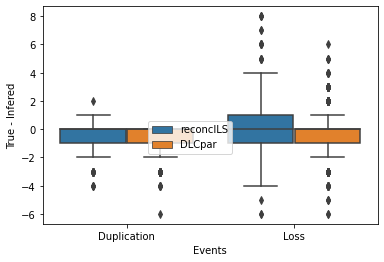

In [216]:
ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
plt.xlabel("Events")
plt.legend(bbox_to_anchor=(0.3,0.3))
plt.ylabel("True - Infered")
plt.savefig('box_plot.jpg', dpi=500)


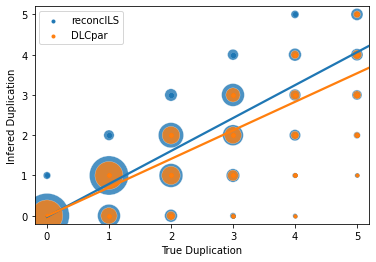

<Figure size 432x288 with 0 Axes>

In [217]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([True_Duplication['Duplication'],O_Duplication['Duplication']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_Duplication['Duplication'],ETE3_Duplication['Duplication']], ignore_index=True,axis=1)
result22=result12.groupby([0,1]).size().reset_index(name='Count')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

# show the graph

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')




plt.xlabel("True Duplication")
plt.ylabel("Infered Duplication")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_dups.png', dpi=500)

plt.show()
plt.clf()

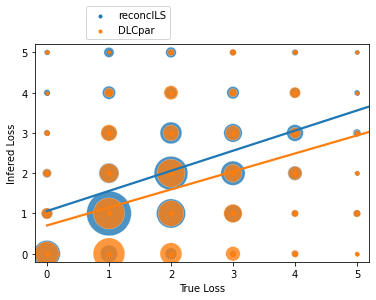

<Figure size 432x288 with 0 Axes>

In [218]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')

result12 =pd.concat([TRUE_Loss['Loss'],ETE3_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss.png', dpi=500)

plt.show()
plt.clf()

In [219]:
r =result1.astype('category')

In [220]:
r

,0,1
0,5,4
1,1,0
2,2,0
3,1,0
4,6,5
...,...,...
923,2,1
924,0,0
925,2,3
926,1,0


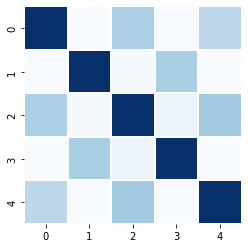

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(50).reshape(10,5))
corr = df.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

In [162]:
np.array([list(result1[0]), list(result1[1])])

array([[5, 1, 2, ..., 2, 1, 1],
       [4, 0, 0, ..., 3, 0, 1]])

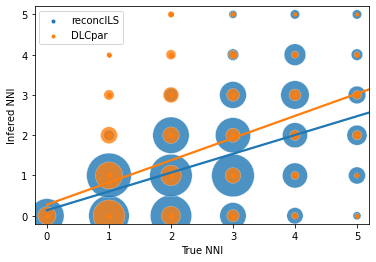

<Figure size 432x288 with 0 Axes>

In [222]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt






result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_DLCILS['DLCILS'],ETE3_DLCILS['DLCILS']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')

#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True NNI")
plt.ylabel("Infered NNI")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI.png', dpi=500)

plt.show()
plt.clf()

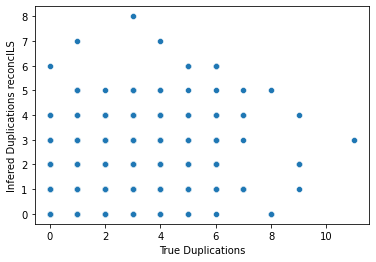

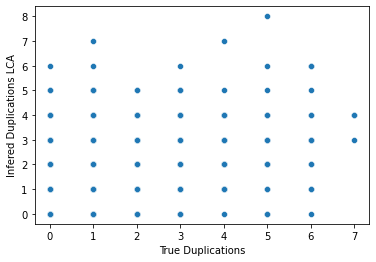

In [223]:
import seaborn as sns



result1 =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
result2 =pd.concat([TRUE_Loss,ETE3_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result1,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications reconcILS")
# Show the plot
plt.show()
plt.clf()

sns.scatterplot(data=result2,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications LCA")
plt.show()

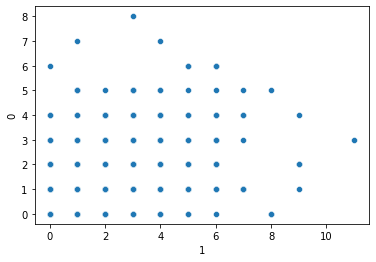

In [224]:
import seaborn as sns



result =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [227]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['NNI']))

In [228]:
rho

0.39219608095447106

In [229]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['NNI']))

In [230]:
rho

0.48044399020008355

In [231]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['NNI']))

In [232]:
rho

0.891798688581447

In [233]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['NNI']))

In [234]:
rho

0.886141089246108

In [235]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['NNI']))

In [236]:
rho

0.5637338655023016

In [237]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI']))

In [238]:
rho

0.6536336325815866